In [1]:
# 1
import numpy as np
import pandas as pd
dataset = pd.read_csv(r'C:\Users\Alchemist\Documents\myProject\datasets\data.csv', header=0,
                      usecols = range(0, 32, 1))
dataset


id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302  malignant        17.99         10.38          122.80   
1      842517  malignant        20.57         17.77          132.90   
2    84300903  malignant        19.69         21.25          130.00   
3    84348301  malignant        11.42         20.38           77.58   
4    84358402  malignant        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424  malignant        21.56         22.39          142.00   
565    926682  malignant        20.13         28.25          131.20   
566    926954  malignant        16.60         28.08          108.30   
567    927241  malignant        20.60         29.33          140.10   
568     92751     benign         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590         0.24390   
565     1261.0          0.09780           0.10340         0.14400   
566      858.1          0.08455           0.10230         0.09251   
567     1265.0          0.11780           0.27700         0.35140   
568      181.0          0.05263           0.04362         0.00000   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                0.14710  ...        25.380          17.33           184.60   
1                0.07017  ...        24.990          23.41           158.80   
2                0.12790  ...        23.570          25.53           152.50   
3                0.10520  ...        14.910          26.50            98.87   
4                0.10430  ...        22.540          16.67           152.20   
..                   ...  ...           ...            ...              ...   
564              0.13890  ...        25.450          26.40           166.10   
565              0.09791  ...        23.690          38.25           155.00   
566              0.05302  ...        18.980          34.12           126.70   
567              0.15200  ...        25.740          39.42           184.60   
568              0.00000  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0

In [2]:
#标签数值化
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder().fit(dataset['diagnosis'])
dataset['diagnosis'] = encoder.transform(dataset['diagnosis'])
print('标签: %s' % encoder.classes_)
print('标签值标准化: %s' % encoder.transform(['benign', 'malignant']))

标签: ['benign' 'malignant']
标签值标准化: [0 1]


In [3]:
X = np.array(dataset)
dataset_target = X[:, 1]
dataset_data = X[:, 2:32]

In [4]:
from collections import Counter
Counter(dataset_target)

Counter({1.0: 212, 0.0: 357})

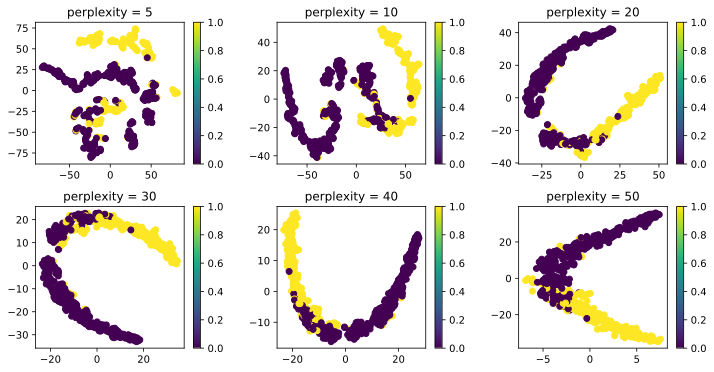

In [10]:
# 画TSNE图
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
X = np.array(dataset)
dataset_target = X[:, 1]
dataset_data = X[:, 2:32]
f, axes = plt.subplots(2, 3, figsize=(12,6))
plt.subplots_adjust(wspace =0.3, hspace =0.3)
# perplexity 从 5~50
perplexity_values = [5, 10, 20, 30, 40, 50]
for i in range(6):
    tsne = TSNE(n_components=2, perplexity=perplexity_values[i])
    dataset_tsne = tsne.fit_transform(dataset_data)
    ax1 = axes[int(i/3),i%3].scatter(dataset_tsne[:, 0], dataset_tsne[:, 1], c = dataset_target)
    #f.legend(ax1, )
    f.colorbar(ax1, ax = axes[int(i/3),i%3])
    axes[int(i/3),i%3].set_title('perplexity = ' + str(perplexity_values[i]))
file_name = 'TSNE.png'
plt.savefig(r'C:\Users\Alchemist\Documents\myProject\ppt\TSNE\TSNE_orgin.png')
plt.show()

In [8]:
#随机采样
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
print(Counter(dataset_target))
# 上采样
ros = RandomOverSampler(random_state=0)
dataset_data_OS, dataset_target_OS = ros.fit_sample(dataset_data, dataset_target)
print(Counter(dataset_target_OS))
# 下采样
rus = RandomUnderSampler()
dataset_data_US, dataset_target_US = rus.fit_sample(dataset_data, dataset_target)
print(Counter(dataset_target_US))

Counter({0.0: 357, 1.0: 212})
Counter({1.0: 357, 0.0: 357})
Counter({0.0: 212, 1.0: 212})


In [5]:
# 画TSNE图
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
X = np.array(dataset)
dataset_target = dataset_target_sm
dataset_data = dataset_data_scaled
f, axes = plt.subplots(2, 3, figsize=(12,6))
plt.subplots_adjust(wspace =0.3, hspace =0.3)
# perplexity 从 5~50
perplexity_values = [5, 10, 20, 30, 40, 50]
for i in range(6):
    tsne = TSNE(n_components=2, perplexity=perplexity_values[i])
    dataset_tsne = tsne.fit_transform(dataset_data)
    ax1 = axes[int(i/3),i%3].scatter(dataset_tsne[:, 0], dataset_tsne[:, 1], c = dataset_target)
    #f.legend(ax1, )
    f.colorbar(ax1, ax = axes[int(i/3),i%3])
    axes[int(i/3),i%3].set_title('perplexity = ' + str(perplexity_values[i]))
file_name = 'TSNE.png'
plt.savefig(r'C:\Users\Alchemist\Documents\myProject\ppt\TSNE\TSNE_scaled.png')
plt.show()

NameError: name 'dataset_target_sm' is not defined

[]

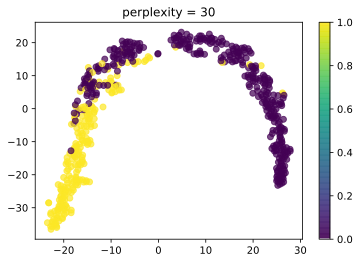

In [15]:
tsne = TSNE(n_components=2, learning_rate = 100, perplexity = 30)
dataset_tsne = tsne.fit_transform(dataset_data)
plt.scatter(dataset_tsne[:, 0], dataset_tsne[:, 1], c = dataset_target, alpha = 0.7)
plt.colorbar()
plt.title('perplexity = 30')
file_name = 'minmax_TSNE.png'
plt.savefig(file_name)
plt.plot()

In [6]:
#SMOTE过采样
from imblearn.over_sampling import SMOTE
smo = SMOTE()
dataset_data_sm, dataset_target_sm = smo.fit_sample(dataset_data, dataset_target)
Counter(dataset_target_sm)

Counter({1.0: 357, 0.0: 357})

In [ ]:
# 组合采样SMOTEENN
from collections import Counter
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
smote_enn = SMOTEENN(random_state=10)
dataset_data_sm, dataset_target_sm = smote_enn.fit_resample(dataset_data, dataset_target)
print(Counter(dataset_target_sm))

In [36]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek()
dataset_data_smT, dataset_target_smT = smt.fit_sample(dataset_data, dataset_target)
Counter(dataset_target)

Counter({0.0: 183, 1.0: 180})

In [7]:
# 数据标准化
from sklearn import preprocessing
import numpy as np
dataset_data_scaled = preprocessing.scale(dataset_data_sm)
# 查看经过标准化处理后，每个特征的均值和标准差
print(dataset_data_scaled.mean(axis=0)) 
print(dataset_data_scaled.std(axis=0))

[-2.77182572e-15 -5.27927375e-15  8.51637466e-16 -2.17504197e-15
  2.86475248e-15 -3.10051937e-15 -9.39180262e-16  1.65320605e-15
  2.89684243e-16 -1.21913062e-14 -1.91909980e-15  5.55966726e-16
  8.54669588e-16 -3.51726118e-16 -2.33745485e-15  7.72024834e-17
  1.46010266e-15  5.84460895e-16 -8.94087170e-17  5.83022581e-16
 -2.73388532e-15 -3.31006620e-15 -3.21871381e-16 -5.09707433e-16
 -2.22479987e-15 -1.00367116e-15  7.52121676e-16 -4.26362960e-16
 -2.32509312e-15  2.14036694e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal dimension_worst']


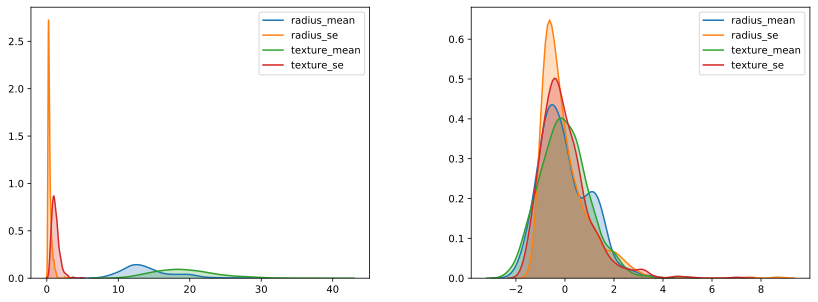

In [9]:
# 画出标准化前后的kde对比图
import matplotlib.pyplot as plt
import seaborn as sns
def analyse(dataset, feature_name, label_name, labels):
    %config InlineBackend.figure_format = 'svg'
    # 后缀列表
    kinds = ['_mean', '_se', '_worst']
    f, axes = plt.subplots(2, 6, figsize = (21, 7), sharex=False)
    plt.subplots_adjust(wspace =0.3, hspace =0.3)#调整子图间距
    for i in range(3):
        # 文件名尾部加上后缀
        feature_name_new =feature_name + kinds[i]
        sns.kdeplot(dataset[feature_name_new], color='black', shade=True, 
                    label=feature_name_new, ax = axes[0, 2*i])
        sns.kdeplot(dataset[dataset[label_name] == labels[0]][feature_name_new], color='r', 
                    shade=True, label=labels[0], ax = axes[0, 1 + 2*i])
        sns.kdeplot(dataset[dataset[label_name] == labels[1]][feature_name_new], color='g', 
                    shade=True, label=labels[1], ax = axes[0, 1 + 2*i])
        sns.violinplot(x=label_name, y=feature_name_new, data=dataset, ax=axes[1, 2*i])
        sns.boxplot(x=label_name, y=feature_name_new, data=dataset, ax=axes[1, 1+ 2*i])
    file_name = feature_name+'.png'
    plt.savefig(r'C:\Users\Alchemist\Documents\myProject\ppt\analyse\\' + file_name)

features = dataset.columns.values.tolist()
# 将列表切片，将标签和id去除
features = features[2:32]
print(features)
f, axes = plt.subplots(1, 2, figsize = (14, 5), sharex=False)
plt.subplots_adjust(wspace =0.3, hspace =0.1)#调整子图间距
for i in [0, 10, 1, 11]:    
    sns.kdeplot(dataset_data[:, i], label=features[i], shade=True, ax=axes[0])
    sns.kdeplot(dataset_data_scaled[:, i], label=features[i], shade=True, ax=axes[1])
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.savefig(r'C:\Users\Alchemist\Documents\myProject\ppt\analyse\\scaled_ra.jpg' )

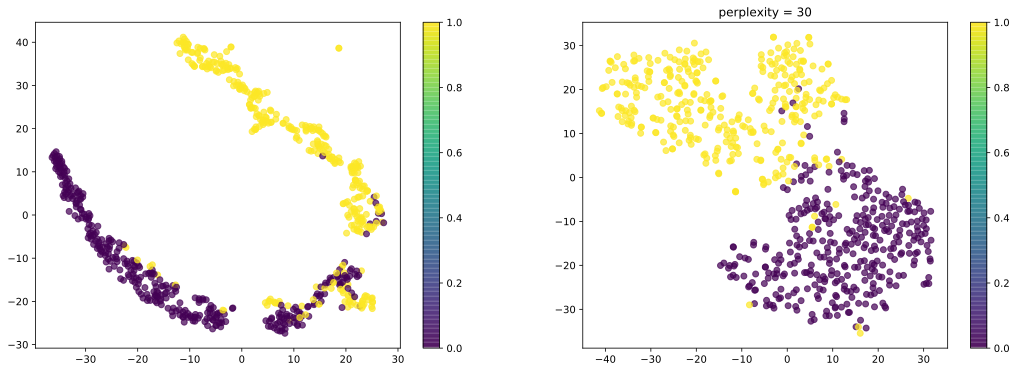

In [29]:
f, axes = plt.subplots(1, 2, figsize=(18,6))
tsne = TSNE(n_components=2, perplexity = 30)
dataset_tsne = tsne.fit_transform(dataset_data_sm)
dataset_scaled = tsne.fit_transform(dataset_data_scaled)
ax1 = axes[0].scatter(dataset_tsne[:, 0], dataset_tsne[:, 1], c = dataset_target_sm, alpha = 0.7)
ax2 = axes[1].scatter(dataset_scaled[:, 0], dataset_scaled[:, 1], c = dataset_target_sm, alpha = 0.7)
plt.title('perplexity = 30')
f.colorbar(ax1, ax = axes[0])
f.colorbar(ax2, ax = axes[1])
plt.savefig(r'C:\Users\Alchemist\Documents\myProject\ppt\TSNE\TSNE_scaled.png')

In [18]:
min_max_scaler = preprocessing.MinMaxScaler()
dataset_minmax = min_max_scaler.fit_transform(dataset_data)

[]

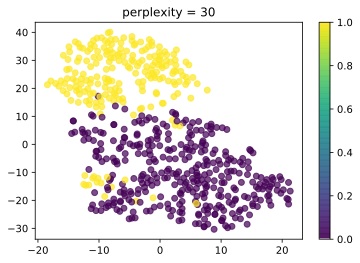

In [19]:
tsne = TSNE(n_components=2, learning_rate = 100, perplexity = 30)
dataset_minmax = tsne.fit_transform(dataset_minmax)
plt.scatter(dataset_minmax[:, 0], dataset_minmax[:, 1], c = dataset_target, alpha = 0.7)
plt.colorbar()
plt.title('perplexity = 30')
file_name = 'minmax_TSNE.png'
plt.savefig(file_name)
plt.plot()

In [45]:
dataset_normalized = preprocessing.normalize(X, norm = 'l2')
dataset_normalized

array([[9.99996369e-01, 1.18721832e-06, 2.13580576e-05, ...,
        3.15087743e-07, 5.46239151e-07, 1.41160259e-07],
       [9.99996031e-01, 1.18691496e-06, 2.44148407e-05, ...,
        2.20766183e-07, 3.26401614e-07, 1.05659170e-07],
       [1.00000000e+00, 1.18622691e-08, 2.33568079e-07, ...,
        2.88253140e-09, 4.28583784e-09, 1.03889753e-09],
       ...,
       [9.99998817e-01, 1.07880091e-06, 1.79080951e-05, ...,
        1.52973969e-07, 2.39278041e-07, 8.43622310e-08],
       [9.99997103e-01, 1.07846515e-06, 2.22163821e-05, ...,
        2.85793265e-07, 4.40768706e-07, 1.33729678e-07],
       [9.99993447e-01, 0.00000000e+00, 8.36643179e-05, ...,
        0.00000000e+00, 3.09536413e-06, 7.58908677e-07]])

[]

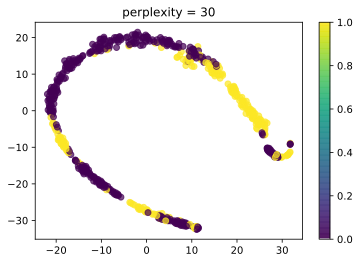

In [46]:
tsne = TSNE(n_components=2, learning_rate = 100, perplexity = 30)
dataset_normalized = tsne.fit_transform(dataset_normalized)
plt.scatter(dataset_normalized[:, 0], dataset_normalized[:, 1], c = dataset_target, alpha = 0.7)
plt.colorbar()
plt.title('perplexity = 30')
file_name = 'normalized_TSNE.png'
plt.savefig(file_name)
plt.plot()

In [3]:
dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null int32
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-

In [36]:
# 特征选择--计算person和p-value 保存成csv
from scipy.stats import pearsonr
pearList = pd.DataFrame(columns={"Person线性相关系数", "P-value", "特征"})
feature_list = dataset.columns.values.tolist()[2:32]
#对于每个特征，求皮尔森线性相关系数
for i in range(len(dataset_data_sm[0])):
    feature_name = feature_list[i]
    pear, p_value = pearsonr(dataset_data_sm[:,i], dataset_target_sm)
    pearList = pearList.append(pd.DataFrame({"Person线性相关系数":[pear], "P-value":[p_value], 
                                             "特征":[feature_name]}), ignore_index=True, sort=True)
pearList.sort_values("Person线性相关系数",inplace=True, ascending=False)
#pearList
# 导出csv文件
pearList.to_csv(r'./person.csv',columns=['Person线性相关系数','P-value', '特征'],
                index=False,sep=',',encoding="utf_8_sig")


In [11]:
dataset_data_sm

array([[1.79900000e+01, 1.03800000e+01, 1.22800000e+02, ...,
        2.65400000e-01, 4.60100000e-01, 1.18900000e-01],
       [2.05700000e+01, 1.77700000e+01, 1.32900000e+02, ...,
        1.86000000e-01, 2.75000000e-01, 8.90200000e-02],
       [1.96900000e+01, 2.12500000e+01, 1.30000000e+02, ...,
        2.43000000e-01, 3.61300000e-01, 8.75800000e-02],
       ...,
       [1.89752730e+01, 2.17413712e+01, 1.24178246e+02, ...,
        1.79778933e-01, 2.56643916e-01, 6.78913079e-02],
       [1.73020788e+01, 1.73286187e+01, 1.12916850e+02, ...,
        1.81403221e-01, 3.10947953e-01, 8.04656311e-02],
       [1.88495190e+01, 2.11844265e+01, 1.23320983e+02, ...,
        2.04226995e-01, 3.64391808e-01, 9.76241544e-02]])

In [8]:
#  生成表示三种相关系数展示的csv文件
from minepy import MINE
discorrList = pd.DataFrame(columns={"距离相关系数", "特征"})
feature_list = dataset.columns.values.tolist()[2:32]
m = MINE()
for i in range(len(dataset_data_sm[0])):
    feature_name = feature_list[i]
    x = dataset_data_sm[:,i]
    score = discorr(x, dataset_target_sm)
    # 返回最大信息系数
    discorrList = discorrList.append(pd.DataFrame({"距离相关系数":[score],  
                                           "特征":[feature_name]}),ignore_index=True, sort=True)
discorrList.sort_values("距离相关系数",inplace=True, ascending=False)
discorrList.to_csv(r'./discorr.csv',columns=['距离相关系数', '特征'],
                index=False,sep=',',encoding="utf_8_sig")

In [7]:
#特征选择--互信息
import numpy as np
from scipy.spatial.distance import pdist, squareform
# 计算距离相关系数
def discorr(X, Y):
    X = np.atleast_1d(X)
    Y = np.atleast_1d(Y)
    # create an axis with length 1
    if np.prod(X.shape) == len(X):
        X = X[:,None]
    if np.prod(Y.shape) == len(Y):
        Y = Y[:,None]
    X = np.atleast_2d(X)
    Y = np.atleast_2d(Y)
    # 行数
    n = X.shape[0]
    if Y.shape[0] != X.shape[0]:
        raise ValueError('Number of sampels must match')
    # 计算距离方阵
    a = squareform(pdist(X))
    b = squareform(pdist(Y))
    A = a - a.mean(axis=0)[None, :] - a.mean(axis=1)[:, None] + a.mean()
    B = b - b.mean(axis=0)[None, :] - b.mean(axis=1)[:, None] + b.mean()

    dcov2_xy = (A * B).sum()/float(n * n)
    dcov2_xx = (A * A).sum()/float(n * n)
    dcov2_yy = (B * B).sum()/float(n * n)
    dcor = np.sqrt(dcov2_xy)/np.sqrt(np.sqrt(dcov2_xx) * np.sqrt(dcov2_yy))
    return dcor

In [17]:
#特征选择--kbest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
classifer = SelectKBest(f_classif, k=10).fit(dataset_data_sm, dataset_target_sm)
mask = classifer.get_support()
X_new = classifer.transform(dataset_data_sm)
features = dataset.columns.values.tolist()[2:]
feature_new = []
for feature, boolean in zip(features, mask):  # zip()返回元组列表
    if boolean == True:
        feature_new.append(feature)
print(feature_new)

['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']


In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
model1 = SelectKBest(chi2, k=10)
model1.fit_transform(dataset_data_scaled, dataset_target_sm)

ValueError: Input X must be non-negative.

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators = 10)
clf = clf.fit(dataset_data, dataset_target)
# 特征重要性
clf.feature_importances_

array([0.18656298, 0.0216278 , 0.02458848, 0.01514974, 0.00631548,
       0.01563788, 0.04097783, 0.04448761, 0.01337101, 0.00442247,
       0.02912643, 0.00670082, 0.00763752, 0.02094108, 0.00310921,
       0.00620084, 0.0045175 , 0.00643771, 0.00682117, 0.00582592,
       0.04245227, 0.02175019, 0.07098494, 0.03946237, 0.01768205,
       0.02111439, 0.16291233, 0.1387775 , 0.00703233, 0.00737217])

In [55]:
# 选择特征重要性为默认均值的特征
model = SelectFromModel(clf, prefit=True, max_features = 2)
# 返回所选的特征
mask = model.get_support()
X_trees = model.transform(dataset_data)
feature_new = []
for feature, boolean in zip(features, mask):
    if boolean == True:
        feature_new.append(feature)
print(feature_new)
print(X_trees)

['perimeter_mean', 'concave points_mean']
[[1.228e+02 1.471e-01]
 [1.329e+02 7.017e-02]
 [1.300e+02 1.279e-01]
 ...
 [1.083e+02 5.302e-02]
 [1.401e+02 1.520e-01]
 [4.792e+01 0.000e+00]]


In [21]:
Selected_data = list(dataset_data_sm[:, [3,23]])
df = pd.DataFrame(data = Selected_data, columns = ['area_mean', 'area_worst'])
df['diagnosis'] = dataset_target_sm
df.to_csv('new_dataset.csv')

In [32]:
import seaborn as sns
import pandas as pd
import numpy as np
new_dataset = pd.read_csv('new_dataset.csv')
#sns.pairplot(new_dataset, vars = ['area_mean', 'area_worst'], )

In [33]:
def Get_Average(list):
    sum = 0
    for num in list:
        sum += num
    avg = sum / len(list)
    return avg

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree
X = dataset_data
y = dataset_target
accuracy = []
split_list = []
depth_list = []
for depth in range(2, 6):
    for split in np.arange(0.1, 1.0, 0.1):
        current = []
        for r in range(40):
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size = split, random_state = r)
            clf = DecisionTreeClassifier(max_depth = depth, criterion = 'entropy')
            clf.fit(X_train, y_train)
            ans = clf.predict(X_test)
            cnt = 0
            # 计算准确率
            for i in range(len(y_test)):
                if ans[i] == y_test[i]:
                    cnt += 1
            c = (cnt / len(y_test))
            current.append(c)
        avg = Get_Average(current)
        split_list.append(split)
        depth_list.append(depth)
        accuracy.append(avg)
print('准确率：', str(accuracy))
#tree.plot_tree()
#df = pd.DataFrame({'split':split_list, 'depth':depth_list, 'accuracy':accuracy})
#df.to_csv('accuracy.csv')

准确率： [0.8921052631578947, 0.9017543859649122, 0.90453216374269, 0.9060307017543859, 0.9121929824561406, 0.9117690058479534, 0.9114035087719297, 0.908168859649123, 0.904288499025341, 0.9249999999999998, 0.9278508771929823, 0.9324561403508771, 0.930921052631579, 0.9278070175438596, 0.9286549707602338, 0.9194862155388469, 0.912390350877193, 0.8980019493177387, 0.9302631578947368, 0.9317982456140349, 0.9352339181286545, 0.9305921052631577, 0.9285087719298245, 0.9256578947368419, 0.9208646616541355, 0.9127741228070176, 0.9035575048732944, 0.9267543859649118, 0.9302631578947367, 0.9342105263157892, 0.9303728070175439, 0.9296491228070176, 0.9251461988304092, 0.9187969924812028, 0.9149122807017547, 0.8988791423001949]


In [176]:
#os.environ["PATH"] += os.pathsep + r'C:\Users\Alchemist\Anaconda3\envs\pytorch\Library\bin\graphviz'
clf = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
X_train, X_test, y_train, y_test = train_test_split(dataset_data_scaled, dataset_target_sm, 
                                                    test_size = 0.1, random_state = 32)
clf.fit(X_train, y_train)
imp = clf.feature_importances_
for i in range(len(imp)):
    if imp[i] != 0:
        print(feature_list[i] + ": " + str(imp[i]))

texture_mean: 0.027308799716055192
area_se: 0.0223449633135961
smoothness_se: 0.0045458264009639
symmetry_se: 0.015470491160410636
texture_worst: 0.029623068711814384
perimeter_worst: 0.7659729300635236
smoothness_worst: 0.06291016314172648
concave points_worst: 0.023408756682543955
symmetry_worst: 0.04841500080936561


In [46]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\Alchemist\Downloads\graphviz-2.38\release\bin'
X = dataset_data_scaled
y = dataset_target_sm
feature_list = dataset.columns.values.tolist()[2:32]
result_list = ['benign', 'malignant']
clf = DecisionTreeClassifier(max_depth = 3, criterion = 'entropy')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 32)
clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feature_list,  
                     class_names=result_list,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render('example.gv', directory=r'C:\Users\Alchemist\Documents\myProject\ppt\tree', view=True)
graph 

ExecutableNotFound: failed to execute ['dot.bat', '-Tpdf', '-O', 'example.gv'], make sure the Graphviz executables are on your systems' PATH

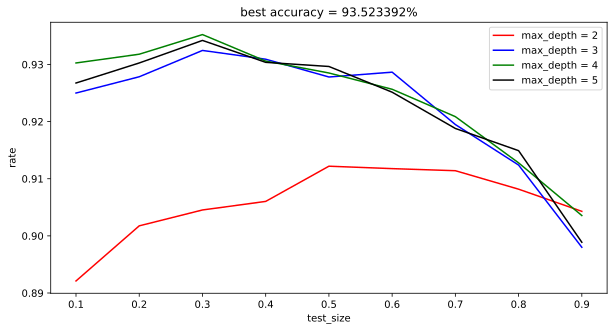

In [36]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
t = np.arange(0.1, 1.0, 0.1)
fig = plt.figure(figsize = (10, 5))
plt.plot(t, accuracy[0:9], c='red', label = 'max_depth = 2')
plt.plot(t, accuracy[9:18], c='blue', label = 'max_depth = 3')
plt.plot(t, accuracy[18:27], c='green', label = 'max_depth = 4')
plt.plot(t, accuracy[27:36], c='black', label = 'max_depth = 5')
plt.xlabel('test_size')
plt.ylabel('rate')
plt.title('best accuracy = %f%%' % (max(accuracy)*100))
plt.legend(loc = 'upper right')
plt.savefig(r'C:\Users\Alchemist\Documents\myProject\ppt\accuracy\2_features.svg')

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.tree
X = dataset_data_scaled
y = dataset_target_sm
accuracy = []
split_list = []
depth_list = []

for split in np.arange(0.05, 1.0, 0.05):
    for depth in range(2, 30):
        current = []
        for r in range(40):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split, random_state = r)
            clf = DecisionTreeClassifier(max_depth = depth, criterion = 'entropy')
            clf.fit(X_train, y_train)
            ans = clf.predict(X_test)
            cnt = 0
            # 计算准确率
            for i in range(len(y_test)):
                if ans[i] == y_test[i]:
                    cnt += 1
            c = (cnt / len(y_test))
            current.append(c)
        avg = Get_Average(current)
        split_list.append(split)
        depth_list.append(depth)
        accuracy.append(avg)
print('准确率：', str(accuracy))
#tree.plot_tree()
#df = pd.DataFrame({'split':split_list, 'depth':depth_list, 'accuracy':accuracy})
#df.to_csv('accuracy.csv')

准确率： [0.9243055555555555, 0.9541666666666664, 0.9472222222222222, 0.9486111111111108, 0.9437499999999996, 0.9486111111111107, 0.9458333333333331, 0.9465277777777775, 0.9458333333333331, 0.9444444444444443, 0.9499999999999998, 0.9486111111111107, 0.9479166666666666, 0.947222222222222, 0.9472222222222217, 0.947222222222222, 0.9486111111111108, 0.947222222222222, 0.9458333333333331, 0.9465277777777776, 0.9493055555555552, 0.9458333333333332, 0.9479166666666664, 0.9479166666666664, 0.9458333333333331, 0.9458333333333331, 0.9458333333333331, 0.9465277777777775, 0.9225694444444447, 0.9444444444444446, 0.9503472222222221, 0.9503472222222221, 0.9461805555555557, 0.9475694444444445, 0.946875, 0.9493055555555555, 0.9510416666666666, 0.9510416666666665, 0.9454861111111112, 0.9493055555555552, 0.9506944444444443, 0.9506944444444443, 0.946875, 0.9527777777777781, 0.9479166666666667, 0.9482638888888889, 0.9493055555555555, 0.9461805555555556, 0.9479166666666667, 0.9513888888888887, 0.950694444444444

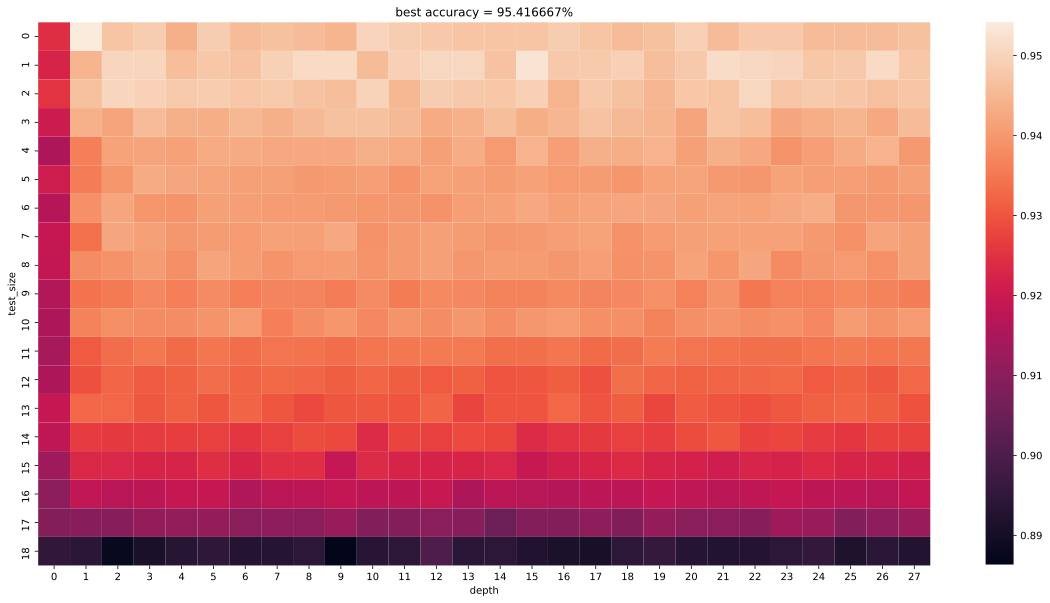

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(accuracy, ax = ax, 
            xticklabels = True, yticklabels = True)
plt.title('best accuracy = %f%%' % (best_accuracy*100))
ax.set_xlabel("depth")
ax.set_ylabel("test_size")
plt.savefig(r'C:\Users\Alchemist\Documents\myProject\ppt\accuracy\all_features.png')

In [23]:
# 准备用于手动决策树的dataset
feature_list = dataset.columns.values.tolist()[2:32]
data = np.array(dataset_data_scaled)
target = np.array(dataset_target_sm)
target = target.reshape(-1, 1)
dataset1 = np.hstack((data, target))
dataset_1 = dataset1.tolist()
benignSample = np.zeros((int(len(dataset1)/2), 31))
malignantSample = np.zeros((int(len(dataset1)/2), 31))
bi = 0
mi = 0
for sample in dataset1:
    if sample[-1] == 0:
        benignSample[bi] = sample
        bi = bi+1
    else:
        malignantSample[mi] = sample
        mi = mi+1
feature_list.append("diagnosis")
benignSample = pd.DataFrame(benignSample, columns= feature_list )
benignSample = benignSample.sample(n=10, frac=None, replace=False, weights=None, random_state=54, axis=0)
#print(benignSample)
#benignSample.to_csv("benignSample.csv")
benignSample = np.array(benignSample)
#print(benignSample)

malignantSample = pd.DataFrame(malignantSample, columns= feature_list )
malignantSample = malignantSample.sample(n=10, frac=None, replace=False, weights=None, random_state=54, axis=0)
#malignantSample.to_csv("malignantSample.csv")
malignantSample = np.array(malignantSample)

new_sample = np.concatenate((benignSample, malignantSample), axis = 0)
print(dataset1)
#print(dataset1.shape)
feature_list = dataset.columns.values.tolist()[2:32]
#print(malignantSample)


[[ 0.85859844 -2.20939748  1.02251854 ...  2.67587932  1.81951656
   1.        ]
 [ 1.55559597 -0.47538416  1.41857017 ... -0.33446892  0.19830294
   1.        ]
 [ 1.31786038  0.34117422  1.30485238 ...  1.06905919  0.12017216
   1.        ]
 ...
 [-0.38739343  0.0140803  -0.40661724 ...  0.36692064 -0.08549864
   1.        ]
 [-0.1374517   0.19999189 -0.08695831 ...  1.31324552  1.73511448
   1.        ]
 [ 1.15584055  1.49563012  1.26410937 ... -1.04746154  0.34241637
   1.        ]]


## 手动决策树

In [28]:
import numpy as np
import math
from operator import itemgetter

# 计算香农熵
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    # 为分类创建字典
    labelCounts = {}
    for featVec in dataSet:
        # 取出标签列表
        currentLabel = featVec[-1]
        # 如果标签不在字典中，则添加进去
        if currentLabel not in labelCounts.keys():
            labelCounts.setdefault(currentLabel, 0)
        # 对应的标签数目加1
        labelCounts[currentLabel] += 1
    # 计算香农墒
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key]) / numEntries
        shannonEnt += prob * math.log2(1 / prob)
    return shannonEnt

def splitDataSet(dataSet, axis, value):
# 返回划分后新的列表，防止对原来的列表进行修改
    retDataSet1 = []
    retDataSet2 = []
    # 遍历整个数据集
    for featVec in dataSet:
        # 根据特征值的取值划分数据即（二分）（连续型变量不需要将当前的划分特征去除）
        if featVec[axis] <= value:
            # 添加到返回列表中
            retDataSet1.append(featVec)
        if featVec[axis] > value:
            retDataSet2.append(featVec)
    return retDataSet1, retDataSet2

# 连续型变量的信息增益，划分点为两个大小相邻的取值的均值
def calcInfoGainForSeries(dataSet, i, baseEntropy):
    maxInfoGain = 0.0
    bestMid = -1
    featList = [example[i] for example in dataSet]
    classList = [example[-1] for example in dataSet]
    dictList = dict(zip(featList, classList))
    # 将其从小到大排序，按照连续值的大小排列
    # .items() 将字典返回为tuple 的 list，operator.itemgetter(0)根据tuple第一项升序排列
    sortedFeatList = sorted(dictList.items(), key=itemgetter(0))
    numberForFeatList = len(sortedFeatList)
    # 计算划分点，保留三位小数
    midFeatList = [round((sortedFeatList[i][0] + sortedFeatList[i+1][0])/2.0, 3)
                   for i in range(numberForFeatList - 1)]
    # 计算出各个划分点信息增益
    for mid in midFeatList:
        # 将连续值划分为不大于当前划分点和大于当前划分点两部分
        eltDataSet, gtDataSet = splitDataSet(dataSet, i, mid)
        # 计算划分后的熵值
        newEntropy = (float(len(eltDataSet))/(len(eltDataSet)+len(gtDataSet))*calcShannonEnt(eltDataSet) + 
        float(len(gtDataSet))/(len(eltDataSet)+len(gtDataSet))*calcShannonEnt(gtDataSet))
        # 计算出信息增益
        infoGain = baseEntropy - newEntropy
        #print('当前特征为：' + str(feature_list[i]) + '，值' + str(mid) + '为分割点的信息增益为：' + str(infoGain))
        if infoGain > maxInfoGain:
            bestMid = mid
            maxInfoGain = infoGain
    return maxInfoGain, bestMid

# 选择最好的划分特征与划分点
def chooseBestFeatureToSplit(dataSet, feature_list):
    numFeatures = len(dataSet[0]) - 1
    # 计算出基础信息熵
    baseEntropy = calcShannonEnt(dataSet)
    bestFeature = -1
    bestInfoGain = 0
    # 最好的特征值的最好划分节点
    bestMid = -1.0
    # 对每个特征值进行求信息熵
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        # 将当前特征唯一化
        uniqueVals = set(featList)
        # 计算信息增益
        infoGain, Mid = calcInfoGainForSeries(dataSet,i, baseEntropy)
        #print('当前特征为：' + str(feature_list[i]) + '，信息增益值为：' + str(infoGain))
        if infoGain > bestInfoGain:
            bestInfoGain = infoGain
            bestFeature = i
            bestMid = Mid
    print('信息增益最大的特征为：' + str(feature_list[bestFeature]), ' 划分点为：'+ str(bestMid)
         + '信息增益为：'+ str(bestInfoGain))
    return bestFeature, bestMid

#chooseBestFeatureToSplit(dataset1)

In [26]:
from math import log
import operator
import numpy as np
from operator import itemgetter

def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys(): classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

def createTree(dataSet, labels, n):
    classList = [example[-1] for example in dataSet]
    # 统计第一个标签出现的次数，与总标签个数比较，
    #如果相等则说明当前列表中全部都是一种标签，此时停止划分
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    # 如果达到了要求的最大深度，就停止递归
    if n <= 0:
        # 返回剩下标签中出现次数较多的那个
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet, labels)
    bestFeatLabel = ''
    midSeries = 0.0
    # 重新修改分叉点信息
    bestFeatLabel = str(labels[bestFeat[0]]) + 
    '小于' + str(bestFeat[1]) + '?'
    # 得到当前的划分点
    midSeries = bestFeat[1]
    # 得到下标值
    bestFeat = bestFeat[0]
    # 使用一个字典来存储树结构，分叉处为划分的特征名称
    myTree = {bestFeatLabel: {}}
    # 得到当前特征标签的所有可能值
    featValues = [example[bestFeat] for example in dataSet]
    # 将连续值划分为不大于当前划分点和大于当前划分点两部分
    eltDataSet, gtDataSet = splitDataSet(dataSet, bestFeat, midSeries)
    # 得到剩下的特征标签
    subLabels = labels[:]
    # 递归处理小于划分点的子树
    subTree = createTree(eltDataSet, subLabels, n-1)
    myTree[bestFeatLabel]['小于'] = subTree
    # 递归处理大于当前划分点的子树
    subTree = createTree(gtDataSet, subLabels, n-1)
    myTree[bestFeatLabel]['大于'] = subTree
    return myTree
tree = createTree(dataset1, feature_list, 3)

信息增益最大的特征为：perimeter_worst 划分点为：-0.259信息增益为：0.6047735124803592
信息增益最大的特征为：concave points_worst 划分点为：0.107信息增益为：0.18068451339662006
信息增益最大的特征为：area_se 划分点为：0.049信息增益为：0.03000436556779311
信息增益最大的特征为：texture_worst 划分点为：0.126信息增益为：0.5297578726233219
信息增益最大的特征为：perimeter_worst 划分点为：0.092信息增益为：0.1617740581761542
信息增益最大的特征为：smoothness_worst 划分点为：0.204信息增益为：0.37608904730123394
信息增益最大的特征为：smoothness_worst 划分点为：-1.551信息增益为：0.05179619198612159


In [30]:
print(tree)

{'perimeter_worst小于-0.259?': {'小于': {'concave points_worst小于0.107?': {'小于': {'area_se小于0.049?': {'小于': 0.0, '大于': 1.0}}, '大于': {'texture_worst小于0.126?': {'小于': 0.0, '大于': 1.0}}}}, '大于': {'perimeter_worst小于0.092?': {'小于': {'smoothness_worst小于0.204?': {'小于': 0.0, '大于': 1.0}}, '大于': {'smoothness_worst小于-1.551?': {'小于': 0.0, '大于': 1.0}}}}}}


## 多分枝决策树

In [11]:
from math import log2
import operator
import numpy as np
import math
from operator import itemgetter

def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    # 为分类创建字典
    labelCounts = {}
    for featVec in dataSet:
        # 取出标签列表
        currentLabel = featVec[-1]
        # 如果标签不在字典中，则添加进去
        if currentLabel not in labelCounts.keys():
            labelCounts.setdefault(currentLabel, 0)
        # 对应的标签数目加1
        labelCounts[currentLabel] += 1
    # 计算香农墒
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key]) / numEntries
        shannonEnt += prob * log2(1 / prob)
    return shannonEnt

def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys(): classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

def splitDataSet_3(dataSet, axis, value1, value2):
# 返回划分后新的列表，防止对原来的列表进行修改
    retDataSet1 = []
    retDataSet2 = []
    retDataSet3 = []
    # 遍历整个数据集
    for featVec in dataSet:
        # 根据特征值的取值划分数据
        if featVec[axis] <= value1:
            # 添加到返回列表中
            retDataSet1.append(list(featVec))
        if  value1 < featVec[axis] <= value2:
            retDataSet2.append(list(featVec))
        if featVec[axis] > value2:
            retDataSet3.append(list(featVec))
    return retDataSet1, retDataSet2, retDataSet3

def calcInfoGainForSeries_3(dataSet, i, baseEntropy):
    maxInfoGain = 0.0
    bestMid = 0,0
    featList = [example[i] for example in dataSet]
    classList = [example[-1] for example in dataSet]
    dictList = dict(zip(featList, classList))
    # .items() 将字典返回为tuple 的 list，operator.itemgetter(0)根据tuple第一项升序排列
    sortedFeatList = sorted(dictList.items(), key=itemgetter(0))
    numberForFeatList = len(sortedFeatList)
    # 计算划分点，保留三位小数
    midFeatList = [round((sortedFeatList[i][0] + sortedFeatList[i+1][0])/2.0, 3)
                   for i in range(numberForFeatList - 1)]
    # 计算出各个划分点信息增益
    for mid1 in midFeatList:
        for mid2 in midFeatList:
            if mid1 < mid2:
                # 将连续值划分为不大于当前划分点和大于当前划分点两部分并计算划分后的熵值
                DataSet_1, DataSet_2, DataSet_3 = splitDataSet_3(dataSet, i, mid1, mid2)
                newEntropy = (
                (float(len(DataSet_1))/(len(DataSet_1)+len(DataSet_2)+
                                        len(DataSet_3))*calcShannonEnt(DataSet_1)) + 
                (float(len(DataSet_2))/(len(DataSet_1)+len(DataSet_2)+
                                        len(DataSet_3))*calcShannonEnt(DataSet_2)) + 
                (float(len(DataSet_3))/(len(DataSet_1)+len(DataSet_2)+
                                        len(DataSet_3))*calcShannonEnt(DataSet_3)))
                # 计算出信息增益
                infoGain = baseEntropy - newEntropy
                if infoGain > maxInfoGain:
                    bestMid = mid1, mid2
                    maxInfoGain = infoGain
    return maxInfoGain, bestMid

def chooseBestFeatureToSplit_3(dataSet, feature_list):
    # 特征值总数
    if dataSet == []:
        return 
    numFeatures = len(dataSet[0]) - 1
    # 计算出基础信息熵
    baseEntropy = calcShannonEnt(dataSet)
    bestFeature = -1
    bestInfoGain = 0
    # 最好的特征值的最好划分节点
    bestMid = 0,0
    # 对每个特征值进行求信息熵
    for i in range(numFeatures):
        # 得到数据集中所有的当前特征值列表
        featList = [example[i] for example in dataSet]
        # 将当前特征唯一化
        uniqueVals = set(featList)
        # 计算信息增益
        infoGain, Mid = calcInfoGainForSeries_3(dataSet,i, baseEntropy)
        if infoGain > bestInfoGain:
            bestInfoGain = infoGain
            bestFeature = i
            bestMid = Mid
    print('信息增益最大的特征为：' + str(feature_list[bestFeature]), '划分点为：'+ str(bestMid))
    return bestFeature, bestMid
                 
def createTree_3(dataSet, labels, n):
    classList = [example[-1] for example in dataSet]
    # 统计第一个标签出现的次数，与总标签个数比较，
    # 如果相等则说明当前列表中全部都是一种标签，此时停止划分
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    # 如果达到了要求的最大深度，就停止递归
    if n <= 0:
        return majorityCnt(classList)
    # 选择最好的划分特征，得到该特征的下标
    bestFeat = chooseBestFeatureToSplit_3(dataSet, labels)
    bestFeatLabel = ''
    midSeries = 0.0
    # 重新修改分叉点信息
    bestFeatLabel = str(labels[bestFeat[0]])
    # 当前的划分点
    midSeries = bestFeat[1][0], bestFeat[1][1]
    # 下标值
    bestFeat = bestFeat[0]
    # 使用一个字典来存储树结构，分叉处为划分的特征名称
    myTree = {bestFeatLabel: {}}
    # 得到当前特征标签的所有可能值
    featValues = [example[bestFeat] for example in dataSet]
    # 将连续值划分为不大于当前划分点和大于当前划分点两部分
    DataSet_1, DataSet_2, DataSet_3 = splitDataSet_3(
        dataSet, bestFeat, midSeries[0], midSeries[1])
    # 递归处理小于划分点1的子树
    if DataSet_1 != []:  
        subTree = createTree_3(DataSet_1, labels, n-1)
        myTree[bestFeatLabel][bestFeatLabel + ' <= ' + str(midSeries[0])] = subTree
    # 递归处理大于划分点1，小于划分点2的子树
    if DataSet_2 != []:
        subTree = createTree_3(DataSet_2, labels, n-1)
        myTree[bestFeatLabel][str(midSeries[0]) + '<'+ bestFeatLabel + 
                              '<=' + str(midSeries[1])] = subTree
    # 递归处理大于划分点2的子树
    if DataSet_3 != []:
        subTree = createTree_3(DataSet_3, labels, n-1)
        myTree[bestFeatLabel][bestFeatLabel + '>' + str(midSeries[1])] = subTree
    return myTree

#print(np.array(new_sample).shape)
tree = createTree_3(dataset1, feature_list, 3)

C:\Users\15813\Anaconda3\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:99: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


信息增益最大的特征为：perimeter_worst 划分点为：(-0.358, 0.092)
(317, 31)
(113, 31)
(284, 31)
信息增益最大的特征为：symmetry_worst 划分点为：(-2.245, 1.884)
(1, 31)
(310, 31)
(6, 31)
信息增益最大的特征为：radius_se 划分点为：(-0.714, -0.711)
(126, 31)
(3, 31)
(181, 31)
信息增益最大的特征为：radius_mean 划分点为：(-1.299, -0.985)
(1, 31)
(1, 31)
(4, 31)
信息增益最大的特征为：smoothness_worst 划分点为：(-0.49, 0.063)
(36, 31)
(23, 31)
(54, 31)
信息增益最大的特征为：smoothness_se 划分点为：(-1.232, -0.068)
(4, 31)
(29, 31)
(3, 31)
信息增益最大的特征为：texture_mean 划分点为：(-0.344, 1.267)
(10, 31)
(12, 31)
(1, 31)
信息增益最大的特征为：concave points_worst 划分点为：(0.169, 0.248)
(7, 31)
(4, 31)
(43, 31)
信息增益最大的特征为：concavity_mean 划分点为：(-0.772, -0.631)
(3, 31)
(2, 31)
(279, 31)


In [14]:
tree = {'concave points_worst<0.187?': {'true': {'perimeter_worst<-0.158?': {'true': {'area_se<0.013?': {'true': 0.0, 'false': 1.0}}, 'false': {'texture_worst<-1.088?': {'true': 0.0, 'false': 1.0}}}}, 'false': {'perimeter_worst<-0.016?': {'true': {'texture_worst<-0.45?': {'true': 0.0, 'false': 1.0}}, 'false': 1.0}}}}

In [87]:
feature_list

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'diagnosis']

In [65]:
import matplotlib.pyplot as plt

decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )
    
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

def plotTree(myTree, parentPt, nodeTxt):#if the first key tells you what feat was split on
    numLeafs = getNumLeafs(myTree)  #this determines the x width of this tree
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]     #the text label for this node should be this
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes   
            plotTree(secondDict[key],cntrPt,str(key))        #recursion
        else:   #it's a leaf node print the leaf node
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
#if you do get a dictonary you know it's a tree, and the first element will be another dict

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    plt.rcParams['savefig.dpi'] = 300 #图片像素
    plt.rcParams['figure.dpi'] = 300 #分辨率
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    #no ticks
    #createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.rcParams['figure.figsize'] = (13.0, 5.0) # 设置figure_size尺寸
    plt.savefig(r"C:\Users\Alchemist\Documents\myProject\ppt\tree\manual_2.png")

#def createPlot():
#    fig = plt.figure(1, facecolor='white')
#    fig.clf()
#    createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
#    plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
#    plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
#    plt.show()

def retrieveTree(i):
    listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                  ]
    return listOfTrees[i]



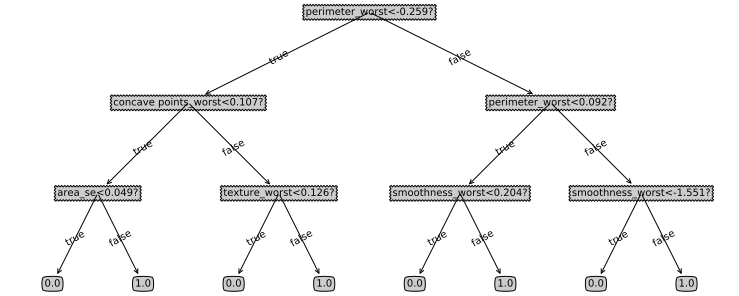

In [66]:
#tree = {'concave points_worst < 0.187?': {'true': {'perimeter_worst < -0.158?': {'true': {'area_se < 0.013?': {'true': 0.0, 'false': 1.0}}, 'false': {'texture_worst < -1.088?': {'true': 0.0, 'false': 1.0}}}}, 'false': {'perimeter_worst < -0.016?': {'true': {'texture_worst < -0.45?': {'true': 0.0, 'false': 1.0}}, 'false': 1.0}}}}
tree = {'perimeter_worst<-0.259?': {'true': {'concave points_worst<0.107?': {'true': {'area_se<0.049?': {'true': 0.0, 'false': 1.0}}, 'false': {'texture_worst<0.126?': {'true': 0.0, 'false': 1.0}}}}, 'false': {'perimeter_worst<0.092?': {'true': {'smoothness_worst<0.204?': {'true': 0.0, 'false': 1.0}}, 'false': {'smoothness_worst<-1.551?': {'true': 0.0, 'false': 1.0}}}}}}
test = retrieveTree(0)
createPlot(tree)